In [174]:
# Povezava do vira podatkovne zbirke: https://podatki.gov.si/dataset/surs0727802s

In [175]:
import warnings
warnings.simplefilter("ignore", category = FutureWarning)

# Uvozimo vse potrebne knjižnice
import pandas as pd
import matplotlib.pyplot as plt
import re

# OPOMBE:
# Najprej smo opravili osnovno transformacijo podatkov s pomočjo programa PX-Win
# (izbor podatkov, transformacijo vrstic in stolpcev)
# Datoteko smo shranili kot .csv, ki ima podatke ločene z ';'
# V Excelu smo ustrezno preimenovali stolpce (nadomestitev šumnikov, določitev smiselnih poimenovanj stolpcev)
# V posameznih celicah, ki so po pretvorbi v .csv datoteko bile v 'date' formatu, smo ustrezno pretvorili v številskega

# Uvozimo .csv datoteko, ki za delimiter uporablja ';'
delovne_ure = pd.read_csv("../../podatki/delovne_ure/delovne_ure.csv", sep = ";")

# V imenih stolpcev izbrišemo nepotrebne narekovaje
delovne_ure = delovne_ure.rename(columns=lambda x: re.sub(r'["]', '', x))
# V vseh vrsticah (z izjemo imen stolpcev) izbrišemo ',' iz same vrednosti – npr. namesto '5.6,,,' bo sedaj vrednost '5.6'
delovne_ure.iloc[:, 1:] = delovne_ure.iloc[:, 1:].applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x)



# Iz četrtletij pretvorimo v leta (po 4 vrstice povprečimo)
leta = list(range(1995, 2023, 1))
delovne_ure = delovne_ure.groupby(pd.cut(delovne_ure.index, bins=len(leta), labels=leta)).mean() # type: ignore
delovne_ure = delovne_ure.rename_axis('LETO').reset_index()

# Pretvorimo stolpec 'LETO' v tip integer
delovne_ure['LETO'] = delovne_ure['LETO'].astype(int)
# Pretvorimo vse ostale stolpce v tip float
delovne_ure.iloc[:, 1:] = delovne_ure.iloc[:, 1:].astype(float)

In [176]:
# Pregled urejenih in filtriranih podatkov
delovne_ure

,LETO,"Placane ure A Kmetijstvo in lov, gozdarstvo, ribistvo",placane ure B Rudarstvo,placane ure C Predelovalne dejavnosti,"placane ure D Oskrba z elektricno energijo, plinom in paro","placane ure E Oskrba z vodo, ravnanje z odplakami in odpadki, saniranje okolja",placane ure F Gradbenistvo,"placane ure G Trgovina, vzdrzevanje in popravila motornih vozil",placane ure H Promet in skladiscenje,placane ure I Gostinstvo,...,Opravljene delovne ure I Gostinstvo,Opravljene delovne ure J Informacijske in komunikacijske dejavnosti,Opravljene delovne ure K Financne in zavarovalniske dejavnosti,Opravljene delovne ure L Poslovanje z nepremicninami,"Opravljene delovne ure M Strokovne, znanstvene in tehnicne dejavnosti",Opravljene delovne ure N Druge raznovrstne poslovne dejavnosti,"Opravljene delovne ure O Dejavnost javne uprave in obrambe, dejavnost obvezne socialne varnosti",Opravljene delovne ure P Izobrazevanje,Opravljene delovne ure Q Zdravstvo in socialno varstvo,"Opravljene delovne ure R Kulturne, razvedrilne in rekreacijske dejavnosti"
0,1995,172.00,171.00,171.75,180.25,173.75,168.75,169.00,173.50,158.25,...,121.75,135.00,133.50,137.50,137.00,136.50,138.00,132.75,136.75,133.75
1,1996,173.25,171.50,173.00,181.75,175.00,169.00,170.25,173.50,158.25,...,120.50,135.25,132.75,137.00,136.00,135.75,136.75,131.25,136.25,134.25
2,1997,172.25,171.50,172.50,181.00,174.50,166.25,169.75,171.00,157.50,...,121.00,136.25,133.50,137.75,136.50,136.25,137.00,132.00,136.25,134.25
3,1998,173.25,171.00,172.25,180.50,173.50,165.75,169.25,169.50,156.25,...,121.75,138.00,134.75,139.50,138.50,137.75,138.25,133.75,138.00,136.50
4,1999,172.25,168.00,171.75,182.00,174.00,167.50,169.50,169.00,156.50,...,122.00,137.75,135.00,139.00,137.75,137.75,138.50,133.25,137.25,136.50
5,2000,174.25,170.50,174.00,181.50,173.75,173.25,169.25,177.25,162.75,...,126.50,134.75,132.00,134.25,133.50,133.75,136.50,131.00,135.50,133.25
6,2001,172.75,170.75,173.75,183.00,174.75,171.25,169.50,176.00,163.75,...,125.75,133.25,131.50,134.25,132.25,132.50,134.00,128.75,134.50,131.25
7,2002,171.75,170.25,174.25,182.50,174.50,172.50,170.50,174.25,167.75,...,130.00,137.00,133.00,137.25,136.00,136.25,134.50,131.25,137.00,135.00
8,2003,170.25,169.50,173.50,180.75,174.50,175.25,171.75,171.75,168.25,...,131.25,137.50,134.25,139.25,137.50,138.00,134.50,132.25,137.50,135.00
9,2004,171.00,172.25,173.25,180.00,174.75,175.00,171.25,171.50,168.50,...,133.75,141.00,136.75,142.00,140.25,140.00,136.75,133.75,139.00,137.75


In [177]:
# Pretvorba v .xlsx datoteko
delovne_ure.to_excel("filtered_delovne_ure.xlsx")

In [178]:
opravljene_ure = pd.merge(delovne_ure.iloc[:, 0], delovne_ure.iloc[:, 20:], left_index = True, right_index = True)
# V imenih stolpcev izbrišemo 'Opravljene delovne ure'
opravljene_ure = opravljene_ure.rename(columns=lambda x: re.sub(r'Opravljene delovne ure', '', x))
opravljene_ure = opravljene_ure.set_index('LETO')
opravljene_ure = opravljene_ure.transpose()


placane_ure = delovne_ure.iloc[:, 0:20]
# V imenih stolpcev izbrišemo 'placane ure'
placane_ure = placane_ure.rename(columns=lambda x: re.sub(r'placane ure', '', x, flags=re.IGNORECASE))
placane_ure = placane_ure.set_index('LETO')
placane_ure = placane_ure.transpose()


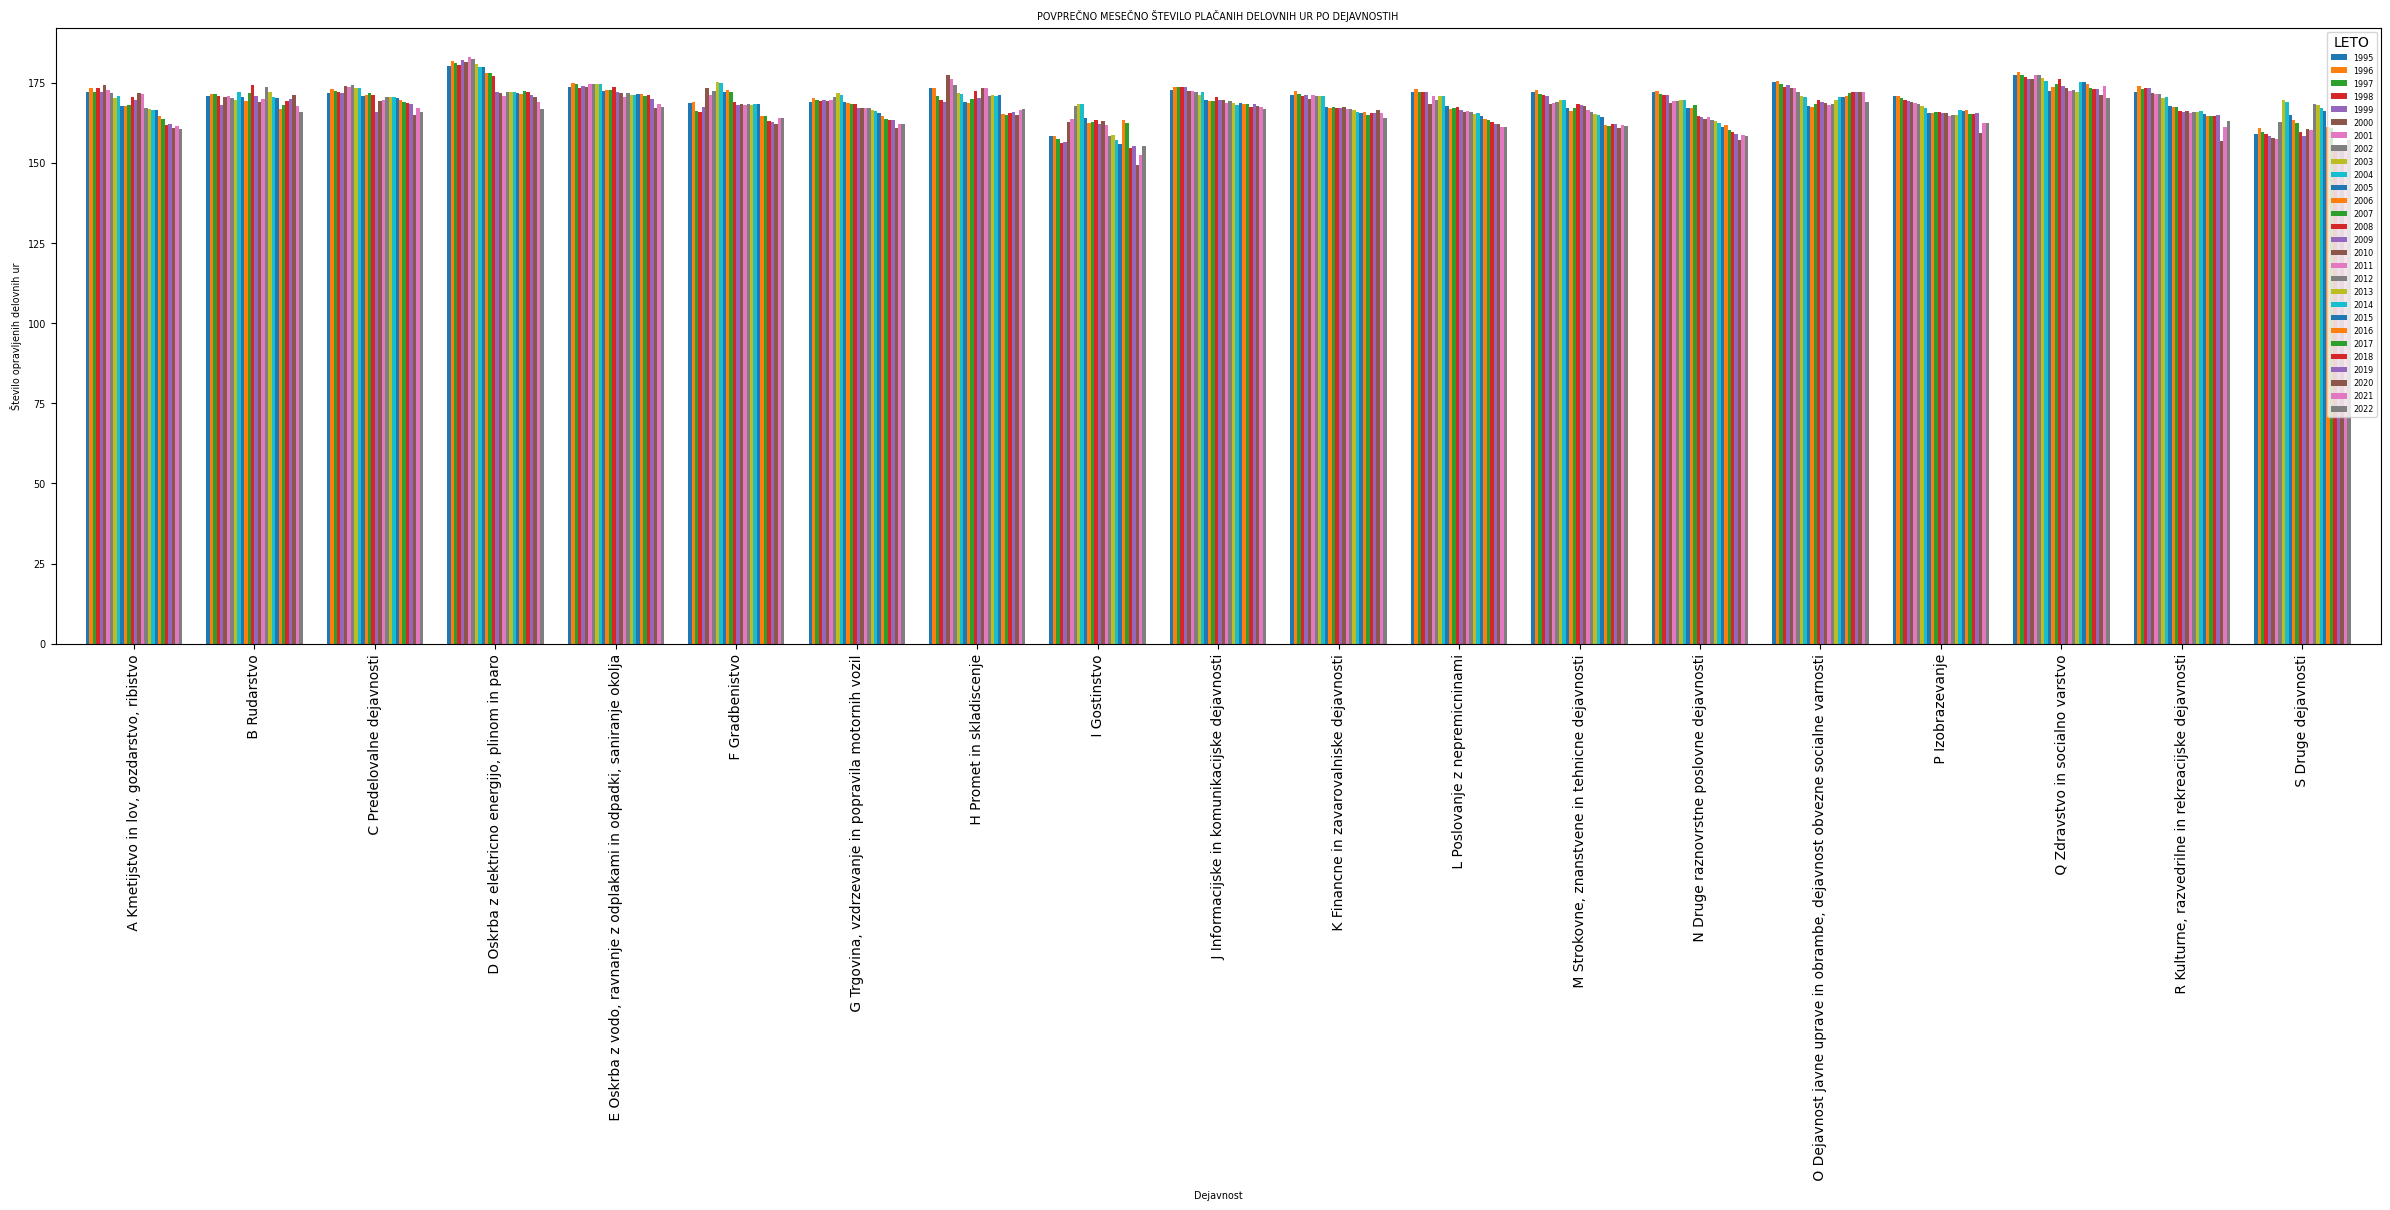

In [179]:
ax = placane_ure.plot(kind='bar', width = 0.8, figsize=(30, 8))
ax.set_xticklabels(placane_ure.index, rotation=90, fontsize=10)
plt.xlabel('Dejavnost')
plt.ylabel('Število opravljenih delovnih ur')
plt.title("POVPREČNO MESEČNO ŠTEVILO PLAČANIH DELOVNIH UR PO DEJAVNOSTIH")
plt.show()

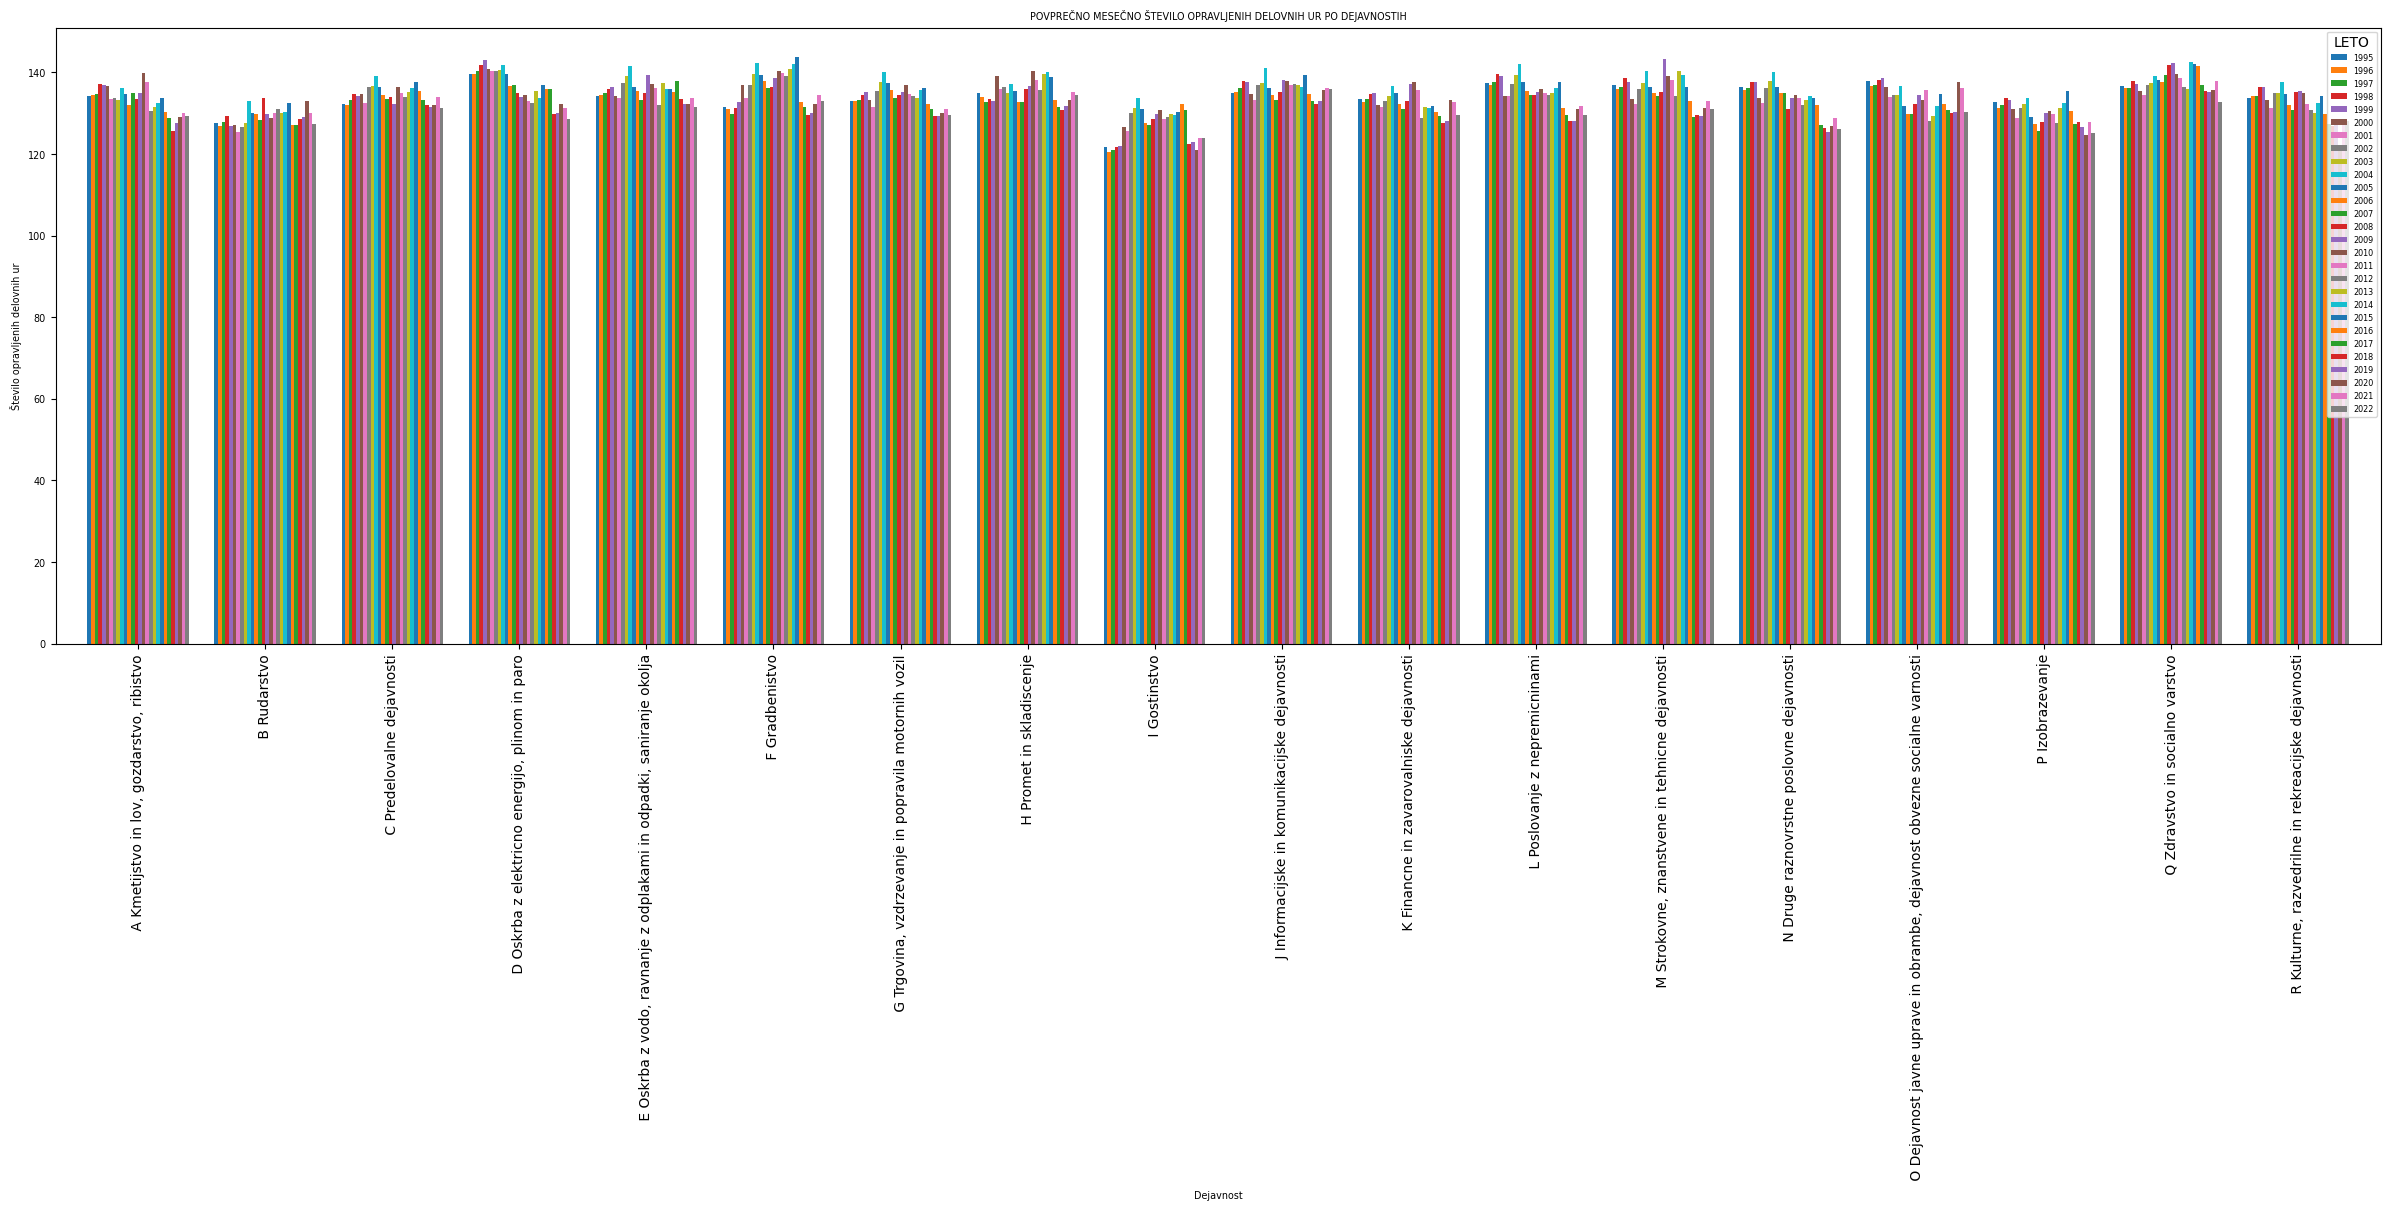

In [180]:
ax = opravljene_ure.plot(kind='bar', width = 0.8, figsize=(30, 8))
ax.set_xticklabels(opravljene_ure.index, rotation=90, fontsize=10)
plt.xlabel('Dejavnost')
plt.ylabel('Število opravljenih delovnih ur')
plt.title("POVPREČNO MESEČNO ŠTEVILO OPRAVLJENIH DELOVNIH UR PO DEJAVNOSTIH")
plt.show()